*Práctica de interpolación*

Antonio Javier Rodríguez Romero y Santiago López Cerro

Construya un array que contenga un conjunto de n puntos equiespaciados del intervalo [-5,5].

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=6
x=np.arange(-5,5,10/n)
x

array([-5.00000000e+00, -3.33333333e+00, -1.66666667e+00,  8.88178420e-16,
        1.66666667e+00,  3.33333333e+00])

Construya un array que contenga las imágenes mediante f de los puntos anteriores.

In [4]:
def f(x):
    return 1/(1+x**2)

In [5]:
y=f(x)
y

array([0.03846154, 0.08256881, 0.26470588, 1.        , 0.26470588,
       0.08256881])

Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver sólo los coeficientes del polinomio de interpolación en su forma de Newton.

In [115]:
def TablaDifDiv (x,y):
    n = np.size(x)
    A = np.zeros([n,n+1])
    coef=np.zeros(n)
    
    for i in range (n):
        A[i,0] = x[i]
        A[i,1] = y[i]
        
    for k in range (2,n+1):
        for j in range (k-1,n):
            A[j,k]=(A[j,k-1]-A[j-1,k-1])/(x[j]-x[j-k+1])

    for q in range(n):
        coef[q] = A[q,q+1]
        
    return coef

Construya una función en Python que a partir del array de puntos y del array de coeficientes proporcione el valor del polinomio interpolación de Newton en un punto x.

In [116]:
def InterpolaNewton(pto,x,coef):
    n=np.size(x)
    suma=0
    for i in range (n):
        sumando=coef[i]
        for j in range (i):
            sumando*=(pto-x[j])
        suma+=sumando
    return suma
     

Utilice la función anterior para construir la gráfica pedida.

(-6.0, 6.0)

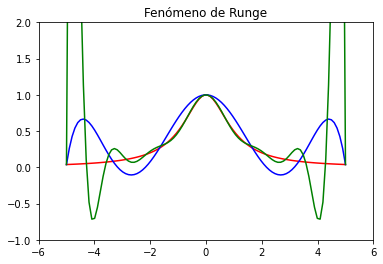

In [135]:
plt.title("Fenómeno de Runge")
# Función original "f(x)"
n=100
xd=np.linspace(-5,5,n)
plt.plot(xd,f(xd),'r',label="f(x)")

# Polinomio "p6"
n=7
xs=np.linspace(-5,5,n)
ys=f(xs)
coef=TablaDifDiv(xs,ys)

for i in range(100):
    yd[i]=InterpolaNewton(xd[i],xs,coef)
plt.plot(xd,yd,'b',label="p6")

# Polinomio "p14"
n=15
xs=np.linspace(-5,5,n)
ys=f(xs)
coef=TablaDifDiv(xs,ys)

for i in range(100):
    yd[i]=InterpolaNewton(xd[i],xs,coef)
plt.plot(xd,yd,'g',label="p14")
plt.ylim(-1,2)
plt.xlim(-6,6)